In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Download the dataset
print("Downloading Google Play Store dataset...")
path = kagglehub.dataset_download("lava18/google-play-store-apps")
print(f"Dataset downloaded to: {path}")

# Load the dataset
file_path = path + "/googleplaystore.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("\nDataset Columns:")
print(df.columns.tolist())
print("\nFirst look at the data:")
print(df.head())

100%|█████████████████████████████████████████████████████████████████████████████| 1.94M/1.94M [00:01<00:00, 1.17MB/s]

Extracting files...


Dataset downloaded to: C:\Users\shrey\.cache\kagglehub\datasets\lava18\google-play-store-apps\versions\6
Dataset Shape: (10841, 13)

Dataset Columns:
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

First look at the data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M

In [4]:
# Check data quality
print("=== DATA QUALITY CHECK ===")
print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

# Display first few rows to understand the data
print("\nFirst 5 rows:")
print(df.head())

=== DATA QUALITY CHECK ===
Dataset shape: (10841, 13)

Missing values:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data types:
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

First 5 rows:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9 

In [5]:
# Check for duplicate apps
print("Number of duplicate apps:", df.duplicated(subset=['App']).sum())

# Remove duplicates, keeping the first occurrence
df_clean = df.drop_duplicates(subset=['App'], keep='first')
print(f"Shape after removing duplicates: {df_clean.shape}")

# Check for obvious data issues
print("\nUnique values in Type:")
print(df_clean['Type'].value_counts())

print("\nUnique values in Content Rating:")
print(df_clean['Content Rating'].value_counts())

# Handle missing values in critical columns
print(f"\nMissing Ratings: {df_clean['Rating'].isnull().sum()}")
print(f"Missing Reviews: {df_clean['Reviews'].isnull().sum()}")

# Remove rows with missing critical data
df_clean = df_clean.dropna(subset=['Rating', 'Type'])
print(f"Shape after removing rows with missing Rating/Type: {df_clean.shape}")

Number of duplicate apps: 1181
Shape after removing duplicates: (9660, 13)

Unique values in Type:
Type
Free    8902
Paid     756
0          1
Name: count, dtype: int64

Unique values in Content Rating:
Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

Missing Ratings: 1463
Missing Reviews: 0
Shape after removing rows with missing Rating/Type: (8197, 13)


In [6]:
# Clean Rating column (ensure values are between 1-5)
df_clean = df_clean[(df_clean['Rating'] >= 1) & (df_clean['Rating'] <= 5)]
print(f"Shape after cleaning ratings: {df_clean.shape}")

# Clean and convert Size column
print("\n=== CLEANING SIZE COLUMN ===")
print("Sample Size values:")
print(df_clean['Size'].head(10))

def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '').replace('+', '').strip()) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', '').replace('+', '').strip())
        elif 'Varies with device' in size:
            return np.nan
    return np.nan

df_clean['Size_KB'] = df_clean['Size'].apply(convert_size)
print("Size column converted to numeric (KB)")

# Clean and convert Installs column
print("\n=== CLEANING INSTALLS COLUMN ===")
print("Sample Installs values:")
print(df_clean['Installs'].head(10))

df_clean['Installs_Clean'] = df_clean['Installs'].str.replace('+', '').str.replace(',', '')
df_clean['Installs_Clean'] = pd.to_numeric(df_clean['Installs_Clean'], errors='coerce')
print("Installs column converted to numeric")

# Clean Price column
print("\n=== CLEANING PRICE COLUMN ===")
df_clean['Price_Clean'] = df_clean['Price'].str.replace('$', '')
df_clean['Price_Clean'] = pd.to_numeric(df_clean['Price_Clean'], errors='coerce')
df_clean['Price_Clean'] = df_clean['Price_Clean'].fillna(0)
print("Price column converted to numeric")

print(f"\nFinal cleaned dataset shape: {df_clean.shape}")
print("\nCleaned data summary:")
print(df_clean[['Rating', 'Size_KB', 'Installs_Clean', 'Price_Clean']].describe())

Shape after cleaning ratings: (8196, 13)

=== CLEANING SIZE COLUMN ===
Sample Size values:
0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object
Size column converted to numeric (KB)

=== CLEANING INSTALLS COLUMN ===
Sample Installs values:
0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object
Installs column converted to numeric

=== CLEANING PRICE COLUMN ===
Price column converted to numeric

Final cleaned dataset shape: (8196, 16)

Cleaned data summary:
            Rating        Size_KB  Installs_Clean  Price_Clean
count  8196.000000    7027.000000    8.196000e+03  8196.000000
mean      4.173243   22276.157635    9.165090e+06     1.037884
std       0.536625   23272.288745    5.825087e+07    16.857882
min       1.000000       8.500000    1.000000e+00     0.000000
25%   

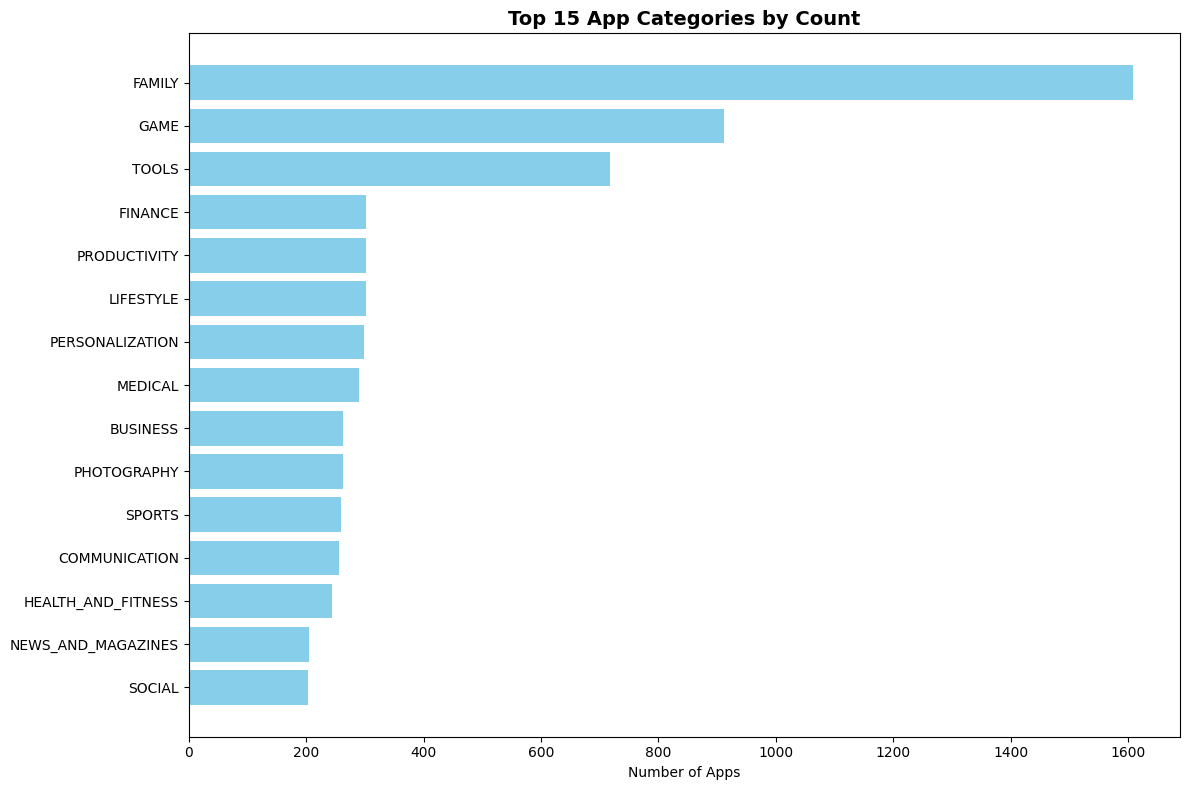

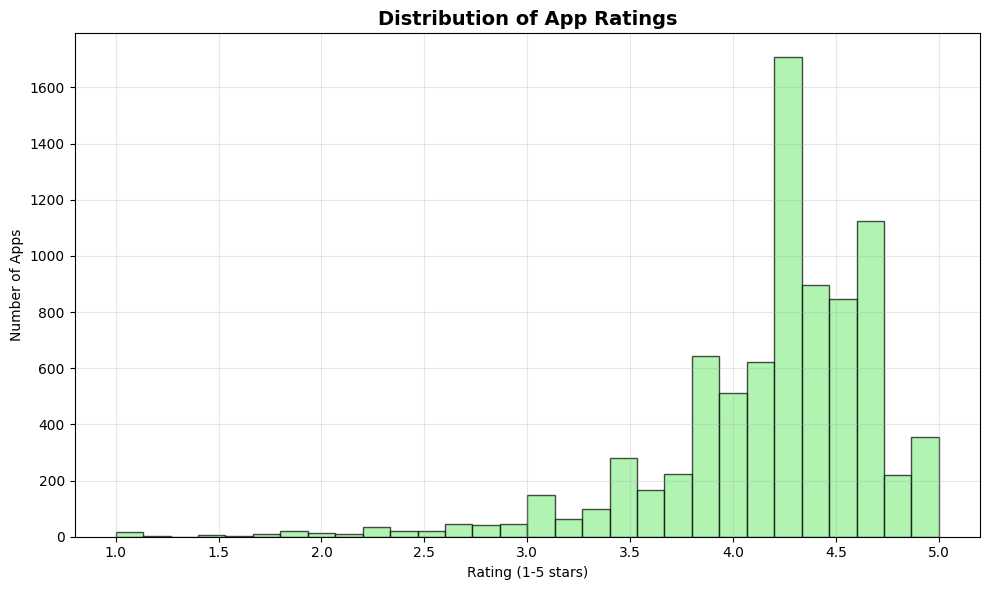

In [7]:
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Visualization 1: App Categories Distribution (Top 15)
plt.figure(figsize=(12, 8))
category_counts = df_clean['Category'].value_counts().head(15)
plt.barh(category_counts.index, category_counts.values, color='skyblue')
plt.title('Top 15 App Categories by Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Apps')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualization 2: Rating Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Rating'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of App Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Number of Apps')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

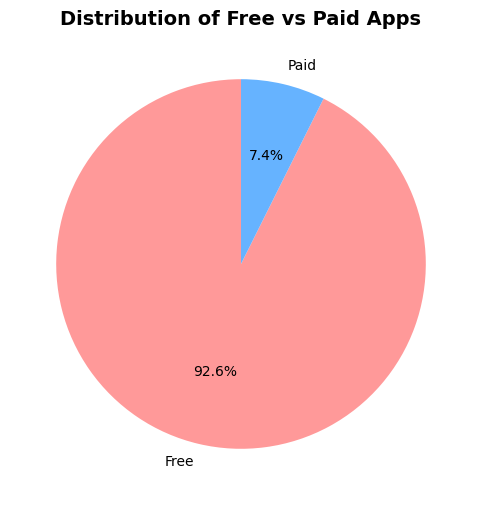

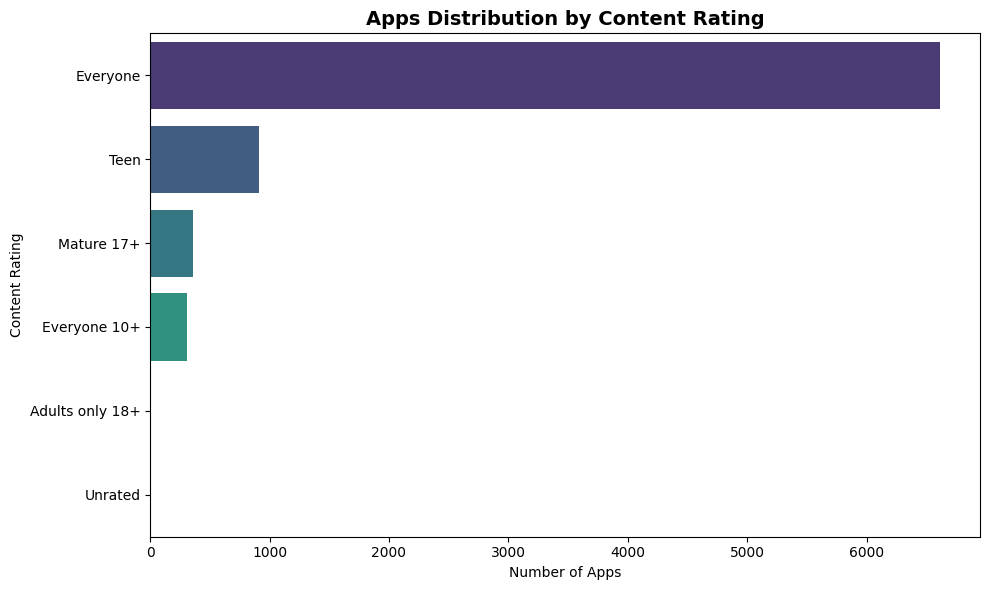

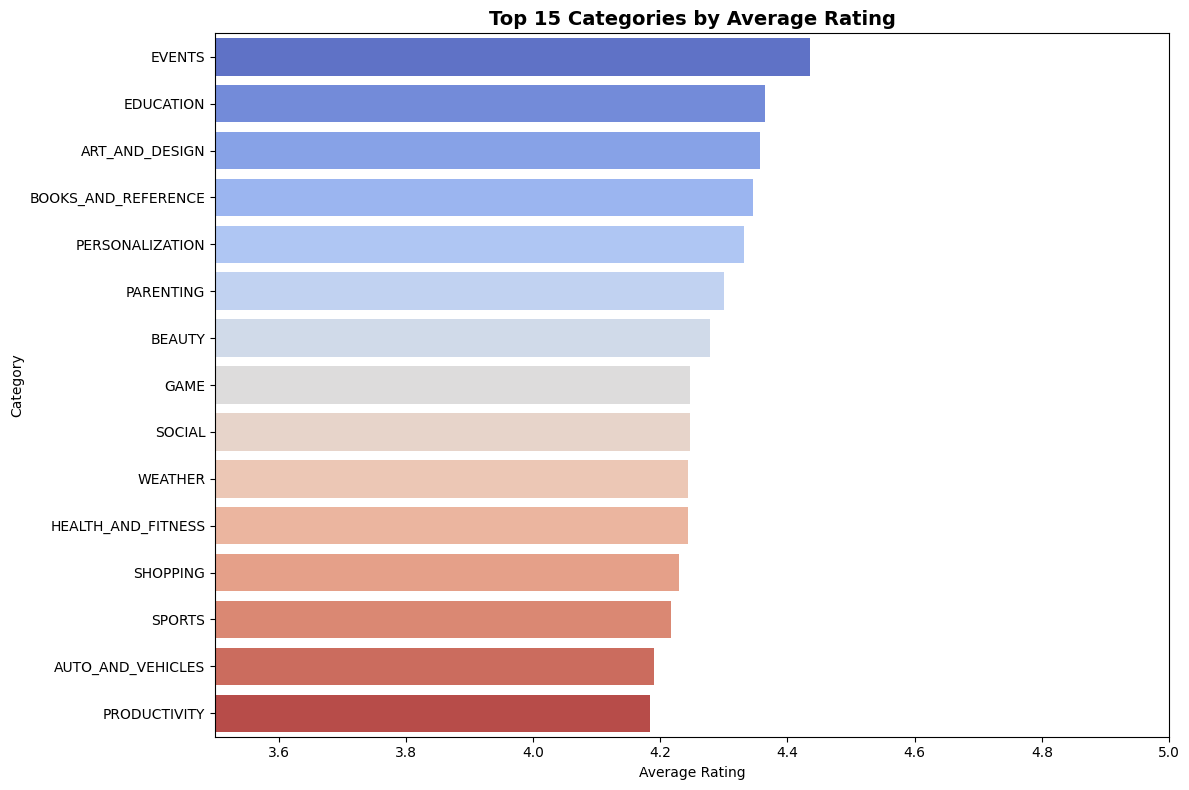

In [8]:
# Visualization 3: Free vs Paid Apps
plt.figure(figsize=(8, 6))
type_counts = df_clean['Type'].value_counts()
colors = ['#ff9999', '#66b3ff']
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Free vs Paid Apps', fontsize=14, fontweight='bold')
plt.show()

# Visualization 4: Content Rating Distribution
plt.figure(figsize=(10, 6))
content_rating = df_clean['Content Rating'].value_counts()
sns.barplot(x=content_rating.values, y=content_rating.index, palette='viridis')
plt.title('Apps Distribution by Content Rating', fontsize=14, fontweight='bold')
plt.xlabel('Number of Apps')
plt.tight_layout()
plt.show()

# Visualization 5: Average Rating by Category (Top 15)
plt.figure(figsize=(12, 8))
rating_by_category = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(y=rating_by_category.index, x=rating_by_category.values, palette='coolwarm')
plt.title('Top 15 Categories by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.xlim(3.5, 5.0)
plt.tight_layout()
plt.show()

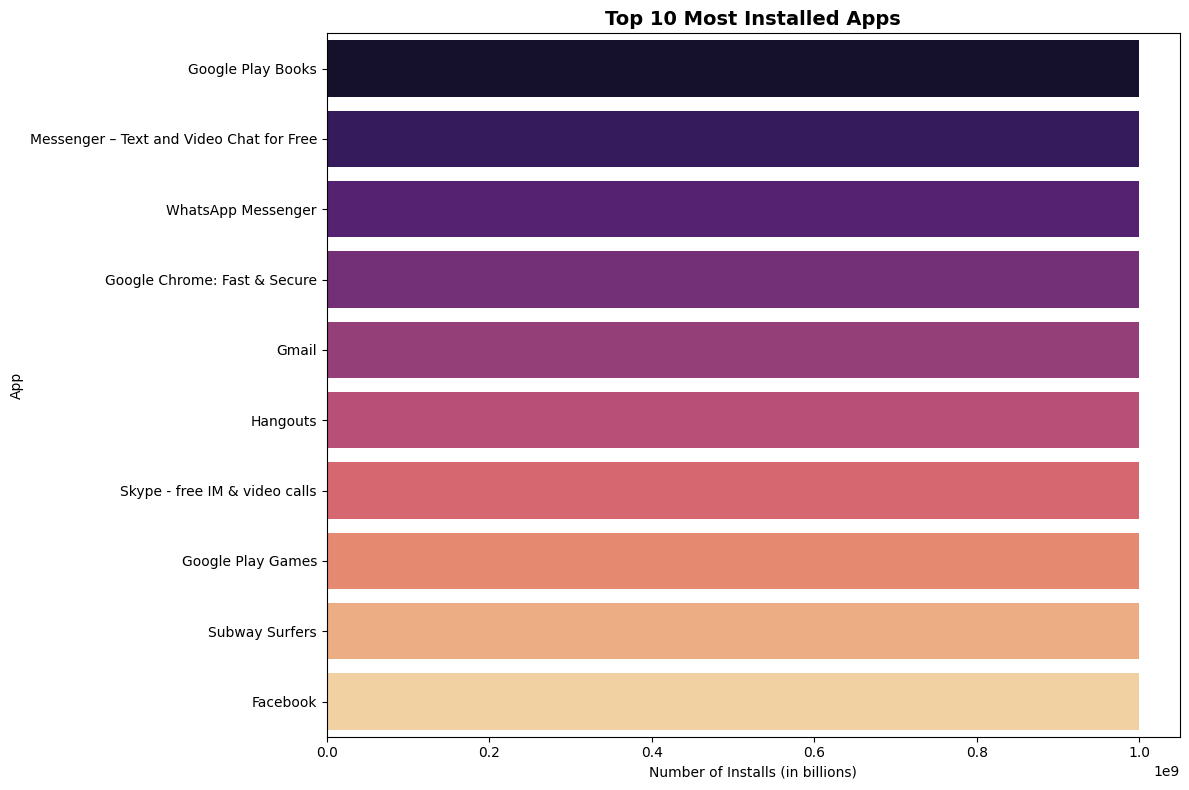

Top 10 Most Installed Apps:
1. Google Play Books - 1,000,000,000 installs - BOOKS_AND_REFERENCE
2. Messenger – Text and Video Chat for Free - 1,000,000,000 installs - COMMUNICATION
3. WhatsApp Messenger - 1,000,000,000 installs - COMMUNICATION
4. Google Chrome: Fast & Secure - 1,000,000,000 installs - COMMUNICATION
5. Gmail - 1,000,000,000 installs - COMMUNICATION
6. Hangouts - 1,000,000,000 installs - COMMUNICATION
7. Skype - free IM & video calls - 1,000,000,000 installs - COMMUNICATION
8. Google Play Games - 1,000,000,000 installs - ENTERTAINMENT
9. Subway Surfers - 1,000,000,000 installs - GAME
10. Facebook - 1,000,000,000 installs - SOCIAL


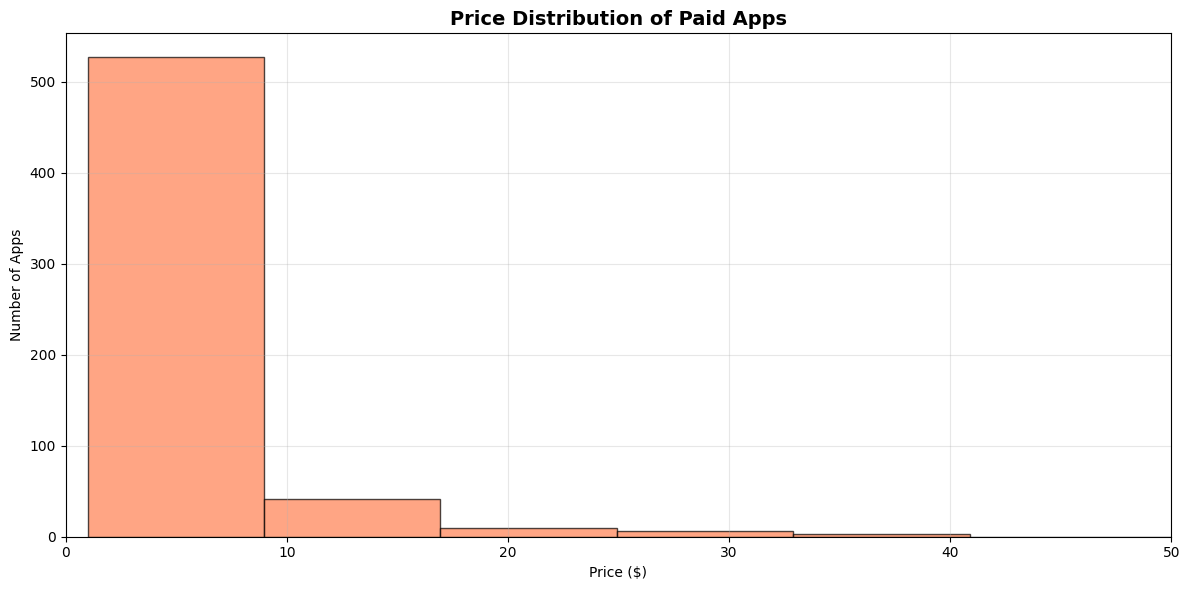

In [9]:
# Visualization 6: Most Installed Apps (Top 10)
plt.figure(figsize=(12, 8))
top_installed = df_clean.nlargest(10, 'Installs_Clean')[['App', 'Installs_Clean', 'Category']]
sns.barplot(y=top_installed['App'], x=top_installed['Installs_Clean'], palette='magma')
plt.title('Top 10 Most Installed Apps', fontsize=14, fontweight='bold')
plt.xlabel('Number of Installs (in billions)')
plt.tight_layout()
plt.show()

print("Top 10 Most Installed Apps:")
for i, (idx, row) in enumerate(top_installed.iterrows(), 1):
    print(f"{i}. {row['App']} - {row['Installs_Clean']:,.0f} installs - {row['Category']}")

# Visualization 7: Price Distribution of Paid Apps
plt.figure(figsize=(12, 6))
paid_apps = df_clean[df_clean['Type'] == 'Paid']
plt.hist(paid_apps['Price_Clean'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Price Distribution of Paid Apps', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.xlim(0, 50)  # Focus on reasonable price range
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

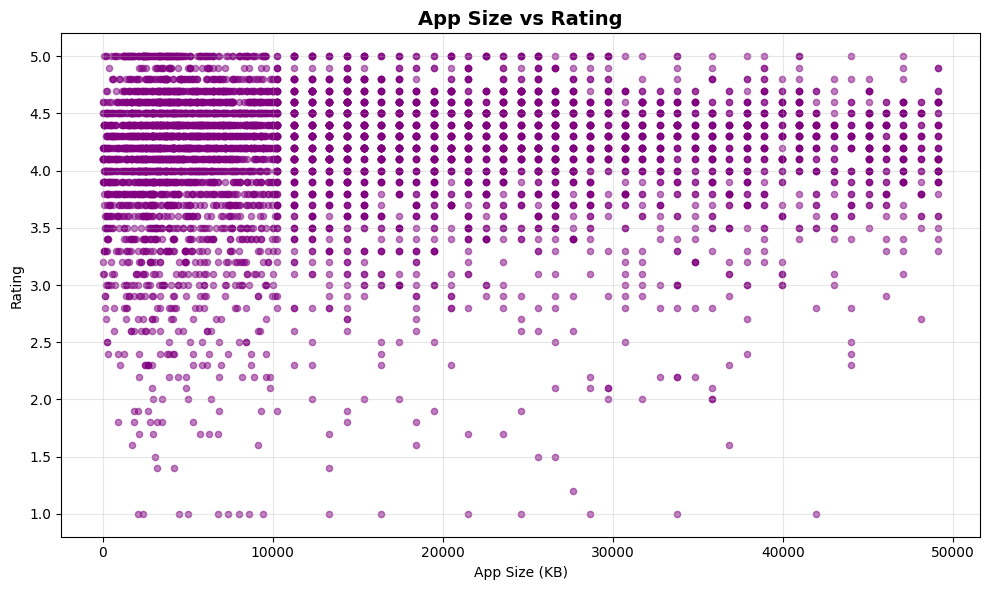

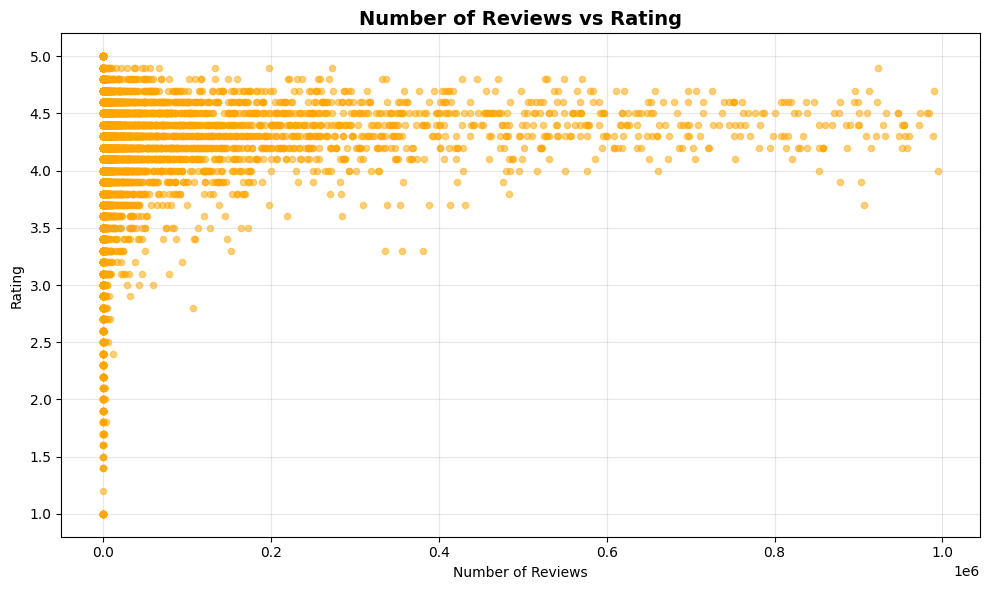

In [10]:
# Visualization 8: App Size vs Rating
plt.figure(figsize=(10, 6))
# Remove outliers for better visualization
size_rating_df = df_clean[(df_clean['Size_KB'] < 50000) & (df_clean['Size_KB'] > 0)]
plt.scatter(size_rating_df['Size_KB'], size_rating_df['Rating'], alpha=0.5, s=20, color='purple')
plt.title('App Size vs Rating', fontsize=14, fontweight='bold')
plt.xlabel('App Size (KB)')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 9: Reviews vs Rating
plt.figure(figsize=(10, 6))
# Convert Reviews to numeric and filter outliers
df_clean['Reviews_Clean'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')
reviews_rating_df = df_clean[df_clean['Reviews_Clean'] < 1000000]  # Remove extreme outliers
plt.scatter(reviews_rating_df['Reviews_Clean'], reviews_rating_df['Rating'], alpha=0.5, s=20, color='orange')
plt.title('Number of Reviews vs Rating', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Generate business insights
print("="*60)
print("📱 ANDROID APP MARKET KEY INSIGHTS")
print("="*60)

# Insight 1: Market composition
total_apps = len(df_clean)
free_apps = len(df_clean[df_clean['Type'] == 'Free'])
free_percentage = (free_apps / total_apps) * 100
print(f"1. Market Composition: {free_percentage:.1f}% of apps are FREE")
print("   → Most apps use freemium/ad-based models")

# Insight 2: Most popular categories
top_category = df_clean['Category'].value_counts().index[0]
top_category_count = df_clean['Category'].value_counts().iloc[0]
print(f"2. Most Competitive Category: {top_category} ({top_category_count} apps)")
print("   → High competition in this space")

# Insight 3: Highest rated categories
best_rated_category = df_clean.groupby('Category')['Rating'].mean().idxmax()
best_rating = df_clean.groupby('Category')['Rating'].mean().max()
print(f"3. Highest Rated Category: {best_rated_category} ({best_rating:.2f}/5)")
print("   → Users are most satisfied with these apps")

# Insight 4: Pricing insights
paid_apps_count = len(df_clean[df_clean['Type'] == 'Paid'])
avg_paid_price = df_clean[df_clean['Type'] == 'Paid']['Price_Clean'].mean()
print(f"4. Paid Apps: {paid_apps_count} paid apps, average price: ${avg_paid_price:.2f}")
print("   → Premium apps are relatively affordable")

# Insight 5: Installation patterns
avg_installs = df_clean['Installs_Clean'].mean()
median_installs = df_clean['Installs_Clean'].median()
print(f"5. Installation Stats: Average {avg_installs:,.0f}, Median {median_installs:,.0f}")
print("   → Few apps get massive downloads, most get moderate")

# Insight 6: Rating distribution
avg_rating = df_clean['Rating'].mean()
rating_above_4 = len(df_clean[df_clean['Rating'] >= 4]) / len(df_clean) * 100
print(f"6. Rating Quality: Average {avg_rating:.2f}/5, {rating_above_4:.1f}% rated 4+ stars")
print("   → Overall high user satisfaction")

print("\n" + "="*60)
print("🎯 BUSINESS RECOMMENDATIONS")
print("="*60)
print("• Focus on FREE apps with in-app purchases for maximum reach")
print(f"• Consider {best_rated_category} category for higher user satisfaction")
print("• Keep premium apps under $5 for better adoption")
print("• Quality matters - aim for 4+ star ratings")
print("• Analyze top installed apps for market trends")
print("="*60)

📱 ANDROID APP MARKET KEY INSIGHTS
1. Market Composition: 92.6% of apps are FREE
   → Most apps use freemium/ad-based models
2. Most Competitive Category: FAMILY (1608 apps)
   → High competition in this space
3. Highest Rated Category: EVENTS (4.44/5)
   → Users are most satisfied with these apps
4. Paid Apps: 604 paid apps, average price: $14.08
   → Premium apps are relatively affordable
5. Installation Stats: Average 9,165,090, Median 100,000
   → Few apps get massive downloads, most get moderate
6. Rating Quality: Average 4.17/5, 76.7% rated 4+ stars
   → Overall high user satisfaction

🎯 BUSINESS RECOMMENDATIONS
• Focus on FREE apps with in-app purchases for maximum reach
• Consider EVENTS category for higher user satisfaction
• Keep premium apps under $5 for better adoption
• Quality matters - aim for 4+ star ratings
• Analyze top installed apps for market trends


In [13]:
print("="*50)
print("1. DATA PREPARATION & CLEANING")
print("="*50)

# Check initial data quality
print(f"Original dataset shape: {df.shape}")
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Data cleaning steps
df_clean = df.copy()

# Remove duplicates
df_clean = df_clean.drop_duplicates(subset=['App'], keep='first')

# Handle missing values
df_clean = df_clean.dropna(subset=['Rating', 'Type'])

# Clean Rating column
df_clean = df_clean[(df_clean['Rating'] >= 1) & (df_clean['Rating'] <= 5)]

# Convert Size to numeric
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '').strip()) * 1024
        elif 'k' in size:
            return float(size.replace('k', '').strip())
        elif 'Varies with device' in size:
            return np.nan
    return np.nan

df_clean['Size_KB'] = df_clean['Size'].apply(convert_size)

# Convert Installs to numeric
df_clean['Installs_Clean'] = df_clean['Installs'].str.replace('+', '').str.replace(',', '')
df_clean['Installs_Clean'] = pd.to_numeric(df_clean['Installs_Clean'], errors='coerce')

# Convert Price to numeric
df_clean['Price_Clean'] = df_clean['Price'].str.replace('$', '')
df_clean['Price_Clean'] = pd.to_numeric(df_clean['Price_Clean'], errors='coerce').fillna(0)

print(f"✅ Cleaned dataset shape: {df_clean.shape}")
print("Data types corrected and missing values handled!")

1. DATA PREPARATION & CLEANING
Original dataset shape: (10841, 13)

Missing values before cleaning:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
✅ Cleaned dataset shape: (8196, 16)
Data types corrected and missing values handled!



2. CATEGORY EXPLORATION


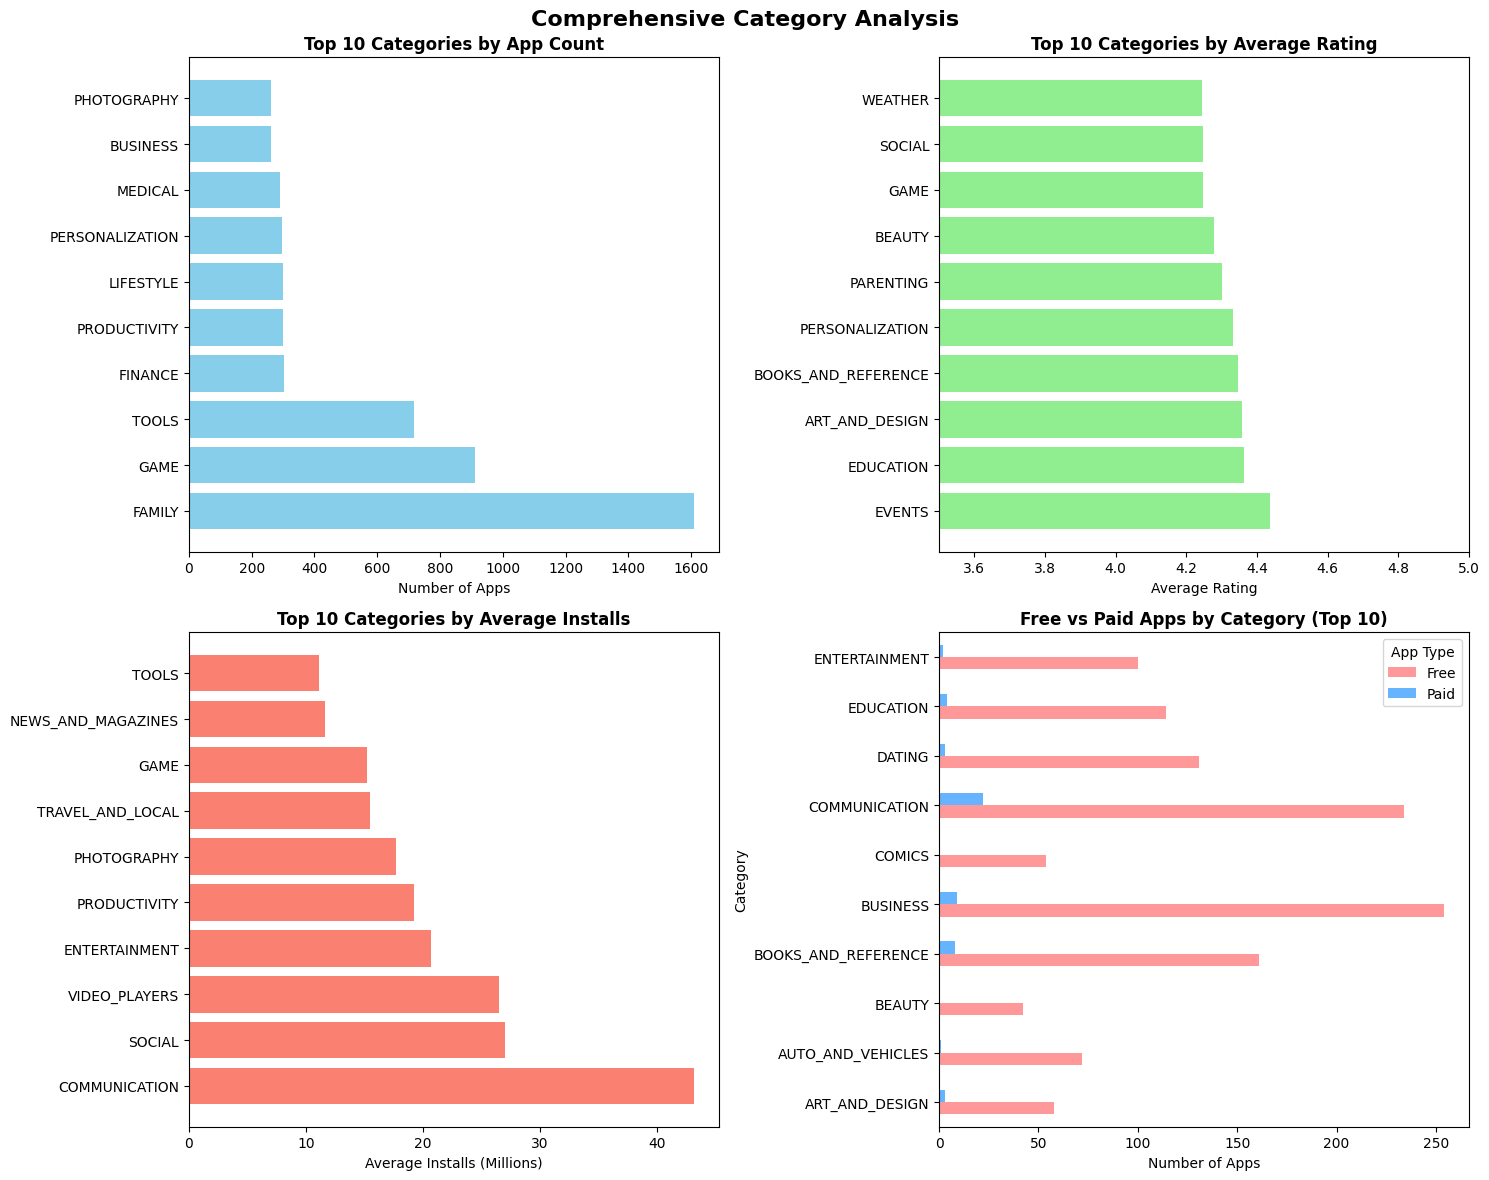

✅ Category exploration completed with 4 comprehensive visualizations


In [14]:
print("\n" + "="*50)
print("2. CATEGORY EXPLORATION")
print("="*50)

# Create subplot for category analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Category Analysis', fontsize=16, fontweight='bold')

# Plot 1: Top Categories by App Count
top_categories = df_clean['Category'].value_counts().head(10)
axes[0,0].barh(top_categories.index, top_categories.values, color='skyblue')
axes[0,0].set_title('Top 10 Categories by App Count', fontweight='bold')
axes[0,0].set_xlabel('Number of Apps')

# Plot 2: Categories by Average Rating
rating_by_cat = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
axes[0,1].barh(rating_by_cat.index, rating_by_cat.values, color='lightgreen')
axes[0,1].set_title('Top 10 Categories by Average Rating', fontweight='bold')
axes[0,1].set_xlabel('Average Rating')
axes[0,1].set_xlim(3.5, 5.0)

# Plot 3: Categories by Average Installs
installs_by_cat = df_clean.groupby('Category')['Installs_Clean'].mean().sort_values(ascending=False).head(10)
axes[1,0].barh(installs_by_cat.index, installs_by_cat.values/1e6, color='salmon')
axes[1,0].set_title('Top 10 Categories by Average Installs', fontweight='bold')
axes[1,0].set_xlabel('Average Installs (Millions)')

# Plot 4: Free vs Paid by Category
category_type = pd.crosstab(df_clean['Category'], df_clean['Type']).head(10)
category_type.plot(kind='barh', ax=axes[1,1], color=['#ff9999', '#66b3ff'])
axes[1,1].set_title('Free vs Paid Apps by Category (Top 10)', fontweight='bold')
axes[1,1].set_xlabel('Number of Apps')
axes[1,1].legend(title='App Type')

plt.tight_layout()
plt.show()

print("✅ Category exploration completed with 4 comprehensive visualizations")

In [19]:
print("="*50)
print("1. DATA PREPARATION & CLEANING")
print("="*50)

print(f"Original dataset shape: {df.shape}")
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Data cleaning steps
df_clean = df.copy()

# Remove duplicates
df_clean = df_clean.drop_duplicates(subset=['App'], keep='first')
print(f"After removing duplicates: {df_clean.shape}")

# Handle missing values
df_clean = df_clean.dropna(subset=['Rating', 'Type'])
print(f"After removing missing Rating/Type: {df_clean.shape}")

# Clean Rating column
df_clean = df_clean[(df_clean['Rating'] >= 1) & (df_clean['Rating'] <= 5)]
print(f"After cleaning ratings: {df_clean.shape}")

# Convert Size to numeric
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '').strip()) * 1024
        elif 'k' in size:
            return float(size.replace('k', '').strip())
        elif 'Varies with device' in size:
            return np.nan
    return np.nan

df_clean['Size_KB'] = df_clean['Size'].apply(convert_size)

# Convert Installs to numeric
df_clean['Installs_Clean'] = df_clean['Installs'].str.replace('+', '').str.replace(',', '')
df_clean['Installs_Clean'] = pd.to_numeric(df_clean['Installs_Clean'], errors='coerce')

# Convert Price to numeric
df_clean['Price_Clean'] = df_clean['Price'].str.replace('$', '')
df_clean['Price_Clean'] = pd.to_numeric(df_clean['Price_Clean'], errors='coerce').fillna(0)

print(f"✅ Final cleaned dataset shape: {df_clean.shape}")
print("\nCleaned data summary:")
print(df_clean[['Rating', 'Size_KB', 'Installs_Clean', 'Price_Clean']].describe())

1. DATA PREPARATION & CLEANING
Original dataset shape: (10841, 13)

Missing values before cleaning:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
After removing duplicates: (9660, 13)
After removing missing Rating/Type: (8197, 13)
After cleaning ratings: (8196, 13)
✅ Final cleaned dataset shape: (8196, 16)

Cleaned data summary:
            Rating        Size_KB  Installs_Clean  Price_Clean
count  8196.000000    7027.000000    8.196000e+03  8196.000000
mean      4.173243   22276.157635    9.165090e+06     1.037884
std       0.536625   23272.288745    5.825087e+07    16.857882
min       1.000000       8.500000    1.000000e+00     0.000000
25%       4.000000    5017.600000    1.000000e+04     0.000000
50%       4.300000   1331